In [1]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

### Hyperparameters

In [2]:
N = 1000   # 샘플 갯수

### Sample generation

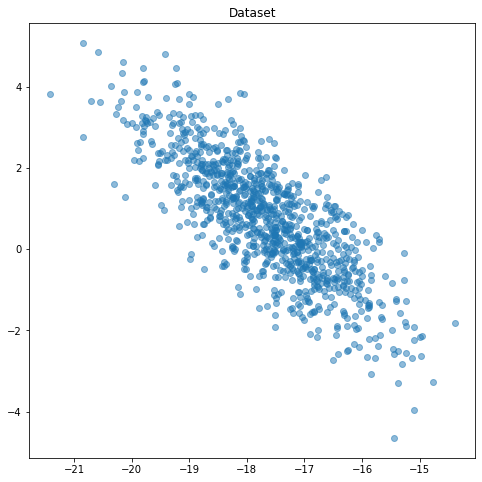

In [13]:
np.random.seed(2020)

# Normal(mean=0, cov=10*I_2)에서 2D 벡터 하나를 샘플링합니다.
mean = np.random.normal(size=2) * 10
# wishart distribution에서 샘플링하여 임의의 covariance matrix를 만들어 냅니다.
cov = scipy.stats.wishart.rvs(3, scale=[[1, 0], [0, 1]])
# 위에서 샘플링한 mean과 covariance를 parameter로 갖는 multivariate normal distribution에서 N개의 샘플을 얻습니다.
# shape : (N, 2)
samples = np.random.multivariate_normal(mean, cov, size=N)
    
# Plot
plt.figure(figsize=[8, 8])
plt.title('Dataset')
plt.scatter(samples[:, 0], samples[:, 1], alpha=0.5)
plt.show()

In [14]:
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms
from matplotlib import colors
from matplotlib import cm

# reference : https://matplotlib.org/devdocs/gallery/statistics/confidence_ellipse.html
def confidence_ellipse(ax, mean, cov, n_std=3.0, facecolor='none', **kwargs):
    
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensionl dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0),
        width=ell_radius_x * 2,
        height=ell_radius_y * 2,
        facecolor=facecolor,
        **kwargs)

    # Calculating the stdandard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std

    # calculating the stdandard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean[0], mean[1])

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)

def plot(ax, samples, mean, cov, title):
    ax.scatter(samples[:, 0], samples[:, 1], alpha=0.5)
    ax.scatter(mean[0], mean[1], marker='x', color='blue')
    confidence_ellipse(ax, mean, cov, edgecolor='blue')
    
    ax.set_title(title)

true mean      : [-17.68845706   0.75552271]
predicted mean : [-17.68446708   0.740725  ]
true covariance :
[[ 1.19003267 -1.23338833]
 [-1.23338833  2.11942699]]
predicted covariance :
[[ 1.19269393 -1.27009711]
 [-1.27009711  2.11425422]]


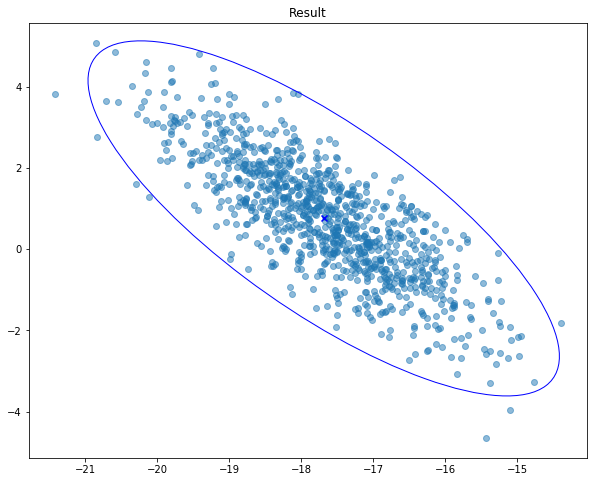

In [15]:
mean_ML = np.sum(samples, axis=0) / N
cov_ML = ((samples - mean_ML).T @ (samples - mean_ML)) / N

print('true mean      :', mean)
print('predicted mean :', mean_ML)
print('true covariance :')
print(cov)
print('predicted covariance :')
print(cov_ML)

fig, ax = plt.subplots(1, 1, figsize=[10, 8])
plot(ax, samples, mean, cov, 'Result')
plt.show()